In [39]:
import pandas as pd

article = pd.read_csv('articleInfo.csv')
author = pd.read_csv('authorInfo.csv')
merge = pd.merge(article, author, on='Article No.')
merge = merge.fillna(0)


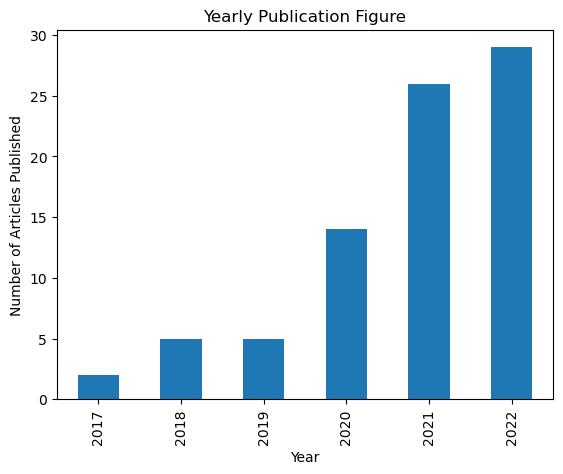

In [40]:
import matplotlib.pyplot as plt

yp = merge.groupby('Year')['Article No.'].nunique()
yp.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of Articles Published")
plt.title("Yearly Publication Figure")
plt.show()

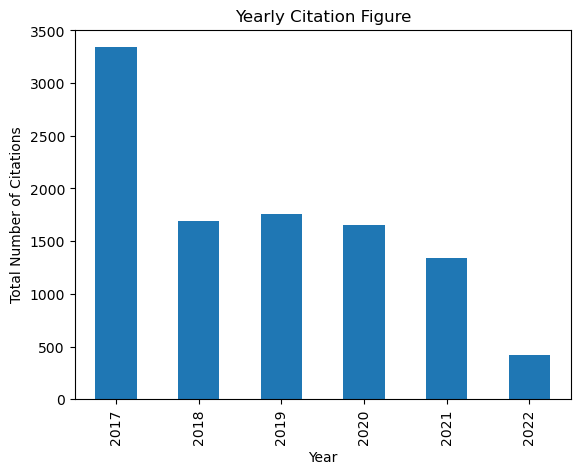

In [41]:
yc = merge.groupby('Year')['Citation'].sum()
yc.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Total Number of Citations")
plt.title("Yearly Citation Figure")
plt.show()





In [78]:
import plotly.express as pe


publications_by_country = merge.groupby('Country')['Article No.'].nunique().reset_index(name='Count')

fig = pe.choropleth(publications_by_country, locations="Country", locationmode='country names', color="Count", title='Number of Publications Across Countries', color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


In [43]:
top_institutions = merge.groupby('Author Affiliation')['Article No.'].nunique().sort_values(ascending=False).head(5)
print(top_institutions)


Author Affiliation
University of Copenhagen                         2
Malaysia University of Science and Technology    2
University of Bristol                            2
Fudan University                                 2
University of Management and Technology          2
Name: Article No., dtype: int64


The top 5 institutions with the most published articles are listed above

In [44]:
top_researchers = merge.groupby('Author Name')['h-index'].max().sort_values(ascending=False).head(5)
print(top_researchers)


Author Name
Ulrich Trautwein       95.0
Nicolas Molinari       63.0
George S. Athwal       59.0
Vicente A. González    33.0
Maria Luisa Lorusso    33.0
Name: h-index, dtype: float64


The top 5 researchers that have the most h-index in the area is listed above

In [45]:
import statsmodels.api as sm

sf = pd.read_csv('data.csv')
sf = sf[['Purchase', 'SUS', 'Duration', 'Gender', 'ASR_Error', 'Intent_Error']]
sf = sf.fillna(0)
y = sf['SUS'] 
x = sf.drop(columns='SUS') 
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        21:53:31   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

x = sf.drop(columns='SUS')
y = sf['SUS']

x_train, x_test, y_train, y_test = train_test_split(x, y)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print("The R square score of linear regression model is: ", lr.score(x_test,y_test))

The R square score of linear regression model is:  0.2376584397871062


In [47]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print("The R square score of 2-order polynomial regression model is: ", plr.score(X_test,Y_test))

The R square score of 2-order polynomial regression model is:  0.5220498503422526


2. The features that were significant are ASR_Error and Intent_Error with p-values less than 0.05. Features that were insignificant were gender, duration, and purchase with p-values greater than 0.05.

3. The results were what I expected. Since SUS is a survey for system usability of Siri, it would make sense that ASR_Error and Intent_Error are significant variables in determining the SUS score. ASR_Error represents the number of times Siri is unable to recognize the user's speech, which means a high ASR_Error would probably cause a lower SUS score. Similarly, Intent_Error represents when Siri misinteprets the user's intentions when Siri processes their speech. Therefore, if Intent_Error is high, the SUS score would also decrease. Gender is not really a significant variable itself because it is unrelated to Siri's ability to interpret the user's speech. Maybe pitch of voice could be considered since females tend to have a higher pitch in their voice compared to males. Duration also isn't really a significant variable since the user's requests could be simple, which would cause shorter durations and vice versa. However, if the user requests a complex task, this could cause the duration to increase because Siri could misinterpret the user's intent and increase the dialogue duration between Siri and the user. I expected purchase to be insignificant as well since the user could be asking Siri for the price of the ticket. If the ticket price is too high, there is a chance that the user will not buy the ticket, which is unrelated to Siri's system usability.

In [48]:
uf = sf.corr(method='pearson')['SUS'].sort_values()
print(uf)

Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Name: SUS, dtype: float64


4. The model suggests that Intent_Error is the most influential factor on SUS. R is the correlation coefficient that tells us the correlation between two variables. The values range from -1 to 1. Values closer to -1 or 1 show a strong relationship between two variables, while values closer to 0 show a weak relationship. Intent_Error has the highest correlaation in this case with a R value of -0.69. The negative tells us that there is a negative correlation, which means as Intent_Error increases, the SUS score goes down. ASR_Error also has a relatively strong negative correlation in this case. Furthermore, Purchase has a strong positive correlation, but the variable itself is insignificant.

5. As mentioned before, ASR_Error represents the number of times Siri is unable to recognize the user's speech, which means a high ASR_Error would probably cause a lower SUS score. Similarly, Intent_Error represents when Siri misinteprets the user's intentions when Siri processes their speech. Therefore, if Intent_Error is high, the SUS score would also decrease.

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df = df[['Purchase','Duration', 'Gender', 'ASR_Error', 'Intent_Error']]
new_df = df

new_df['Purchase'] = new_df['Purchase'].fillna(df['Purchase'].mean())
new_df['Duration'] = new_df['Duration'].fillna(df['Duration'].mean())
new_df['Gender'] = new_df['Gender'].fillna(df['Gender'].mean())
new_df['ASR_Error'] = new_df['ASR_Error'].fillna(df['ASR_Error'].mean())
new_df['Intent_Error'] = new_df['Intent_Error'].fillna(df['Intent_Error'].mean())


              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.88      1.00      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.88      1.00      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.88      1.00      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30

              preci

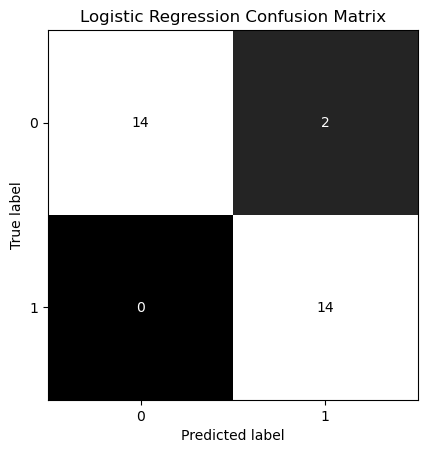

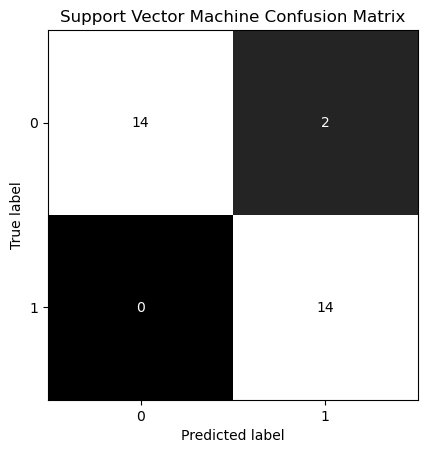

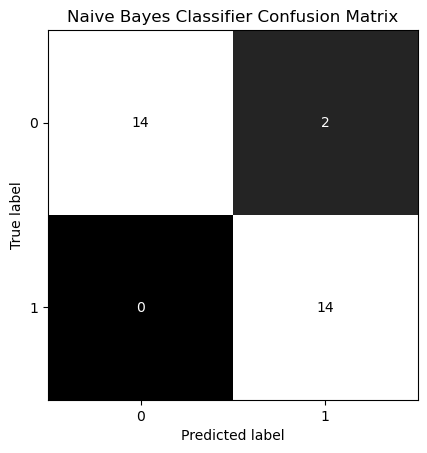

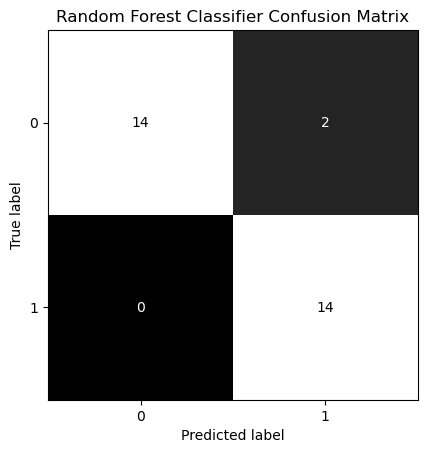

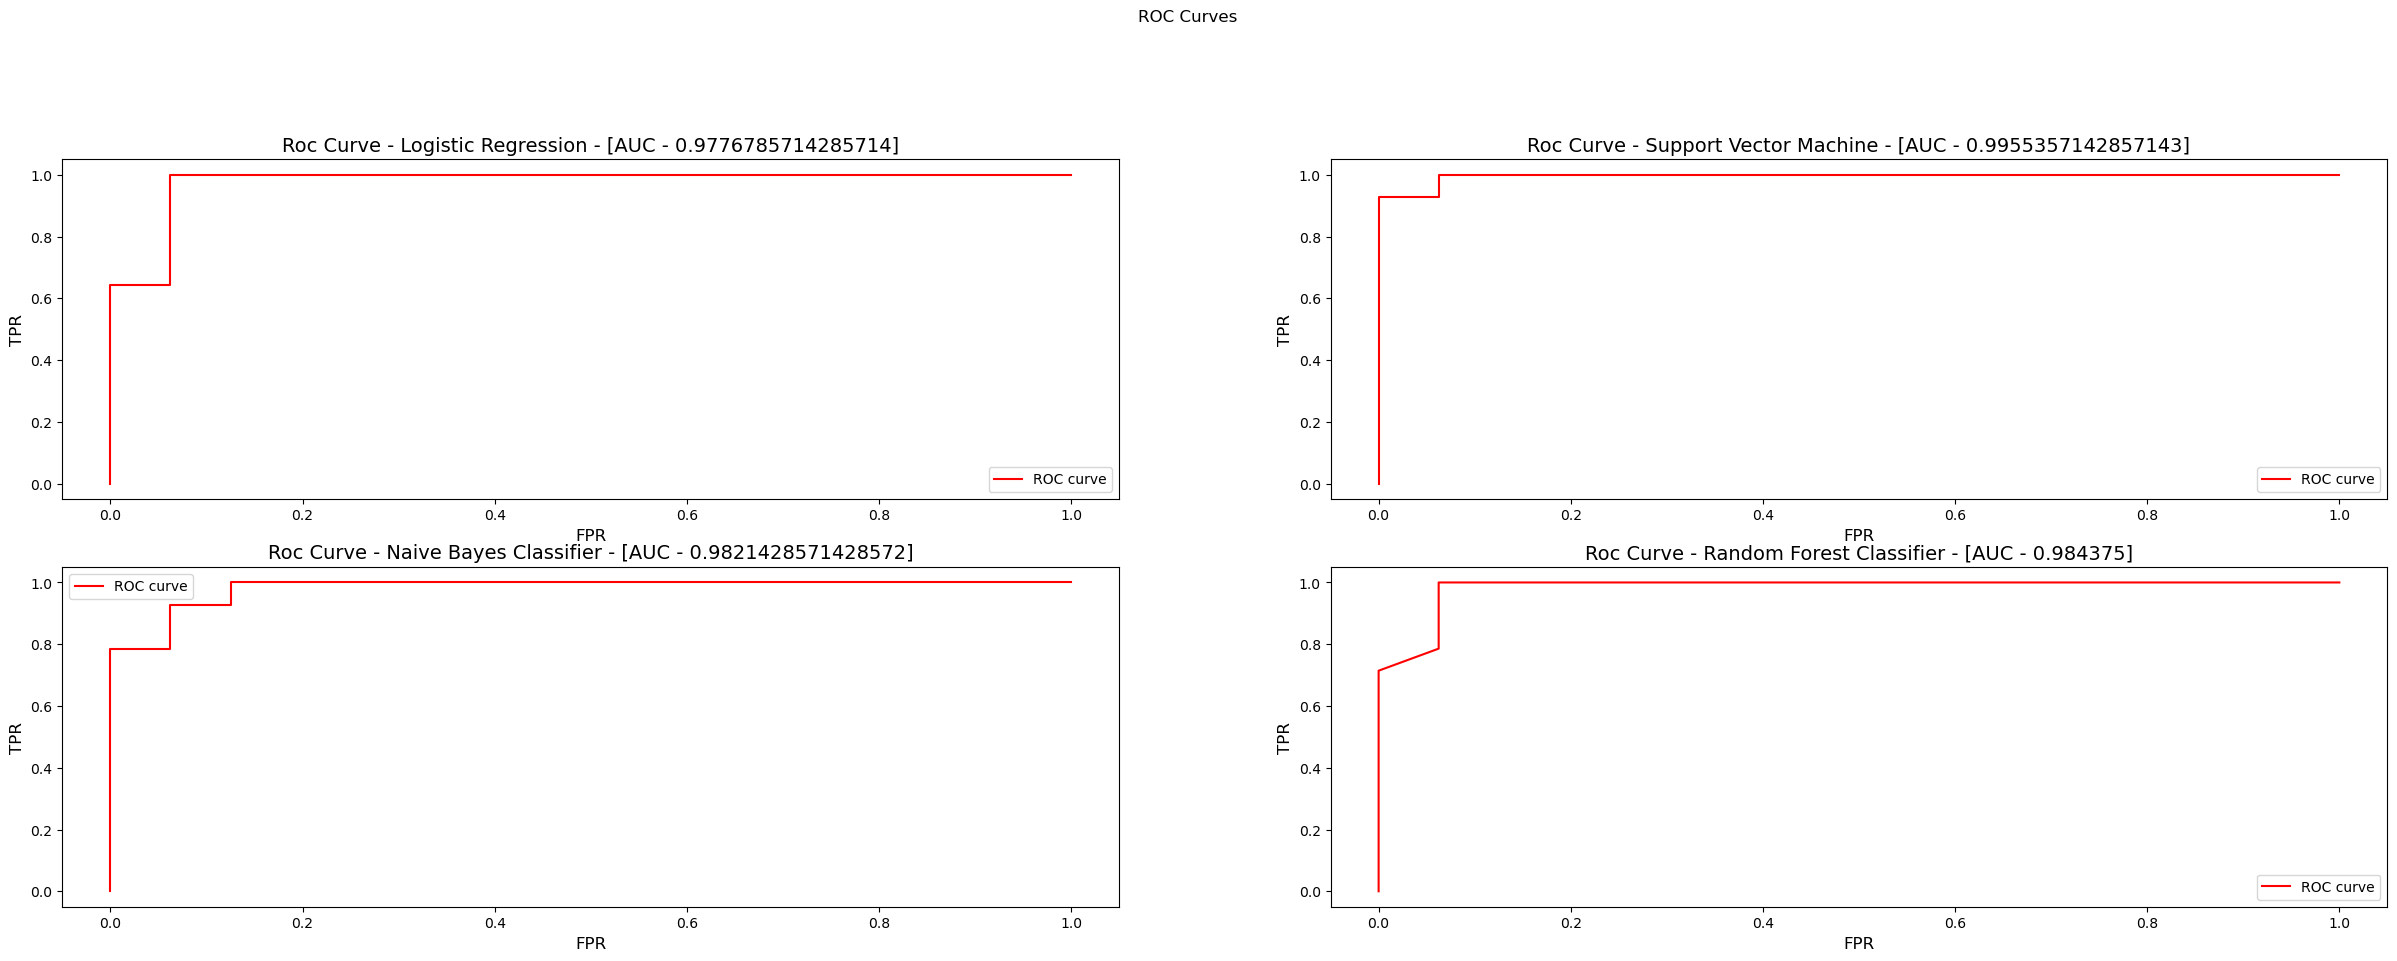

In [117]:
y = df['Purchase'].to_numpy()
X = df.drop('Purchase', axis = 1).to_numpy()

from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

scale = StandardScaler()
scaled_X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

lc = LogisticRegression()
#neigh = KNeighborsClassifier(n_neighbors=3)
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

lc.fit(X_train, y_train)
#neigh.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

#y_knn_predicted = neigh.predict(X_test)
#y_knn_pred_proba = neigh.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)
print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.88      1.00      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30

              precision    recall  f1-score   support

           0       0.43      0.38      0.40        16
           1       0.38      0.43      0.40        14

    accuracy                           0.40        30
   macro avg       0.40      0.40      0.40        30
weighted avg       0.40      0.40      0.40        30

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.88      1.00      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30

              preci

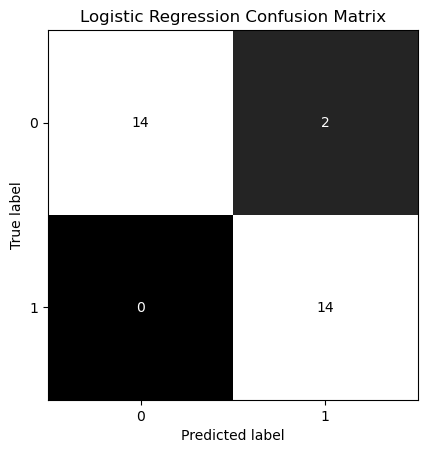

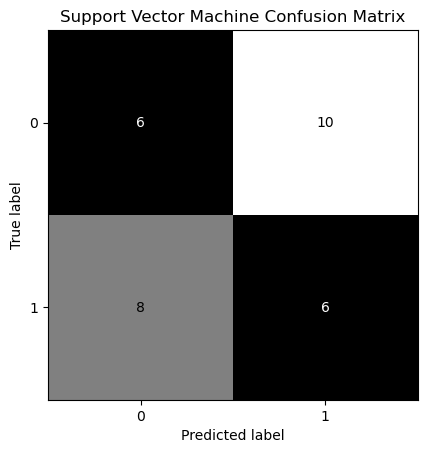

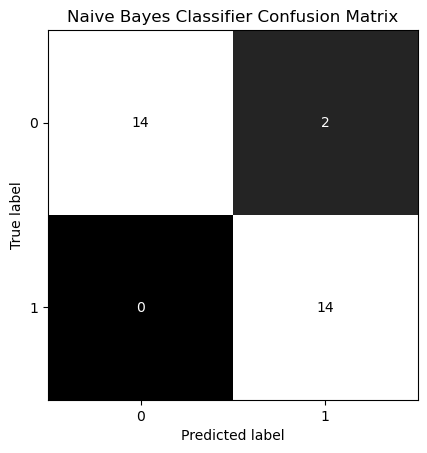

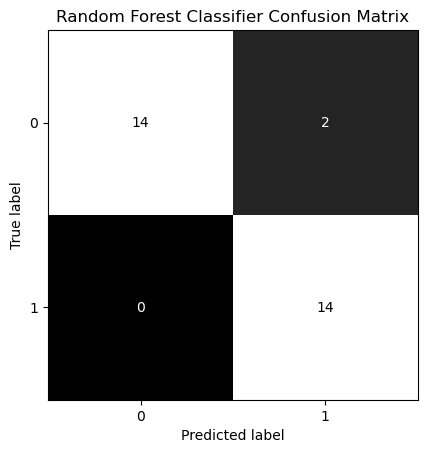

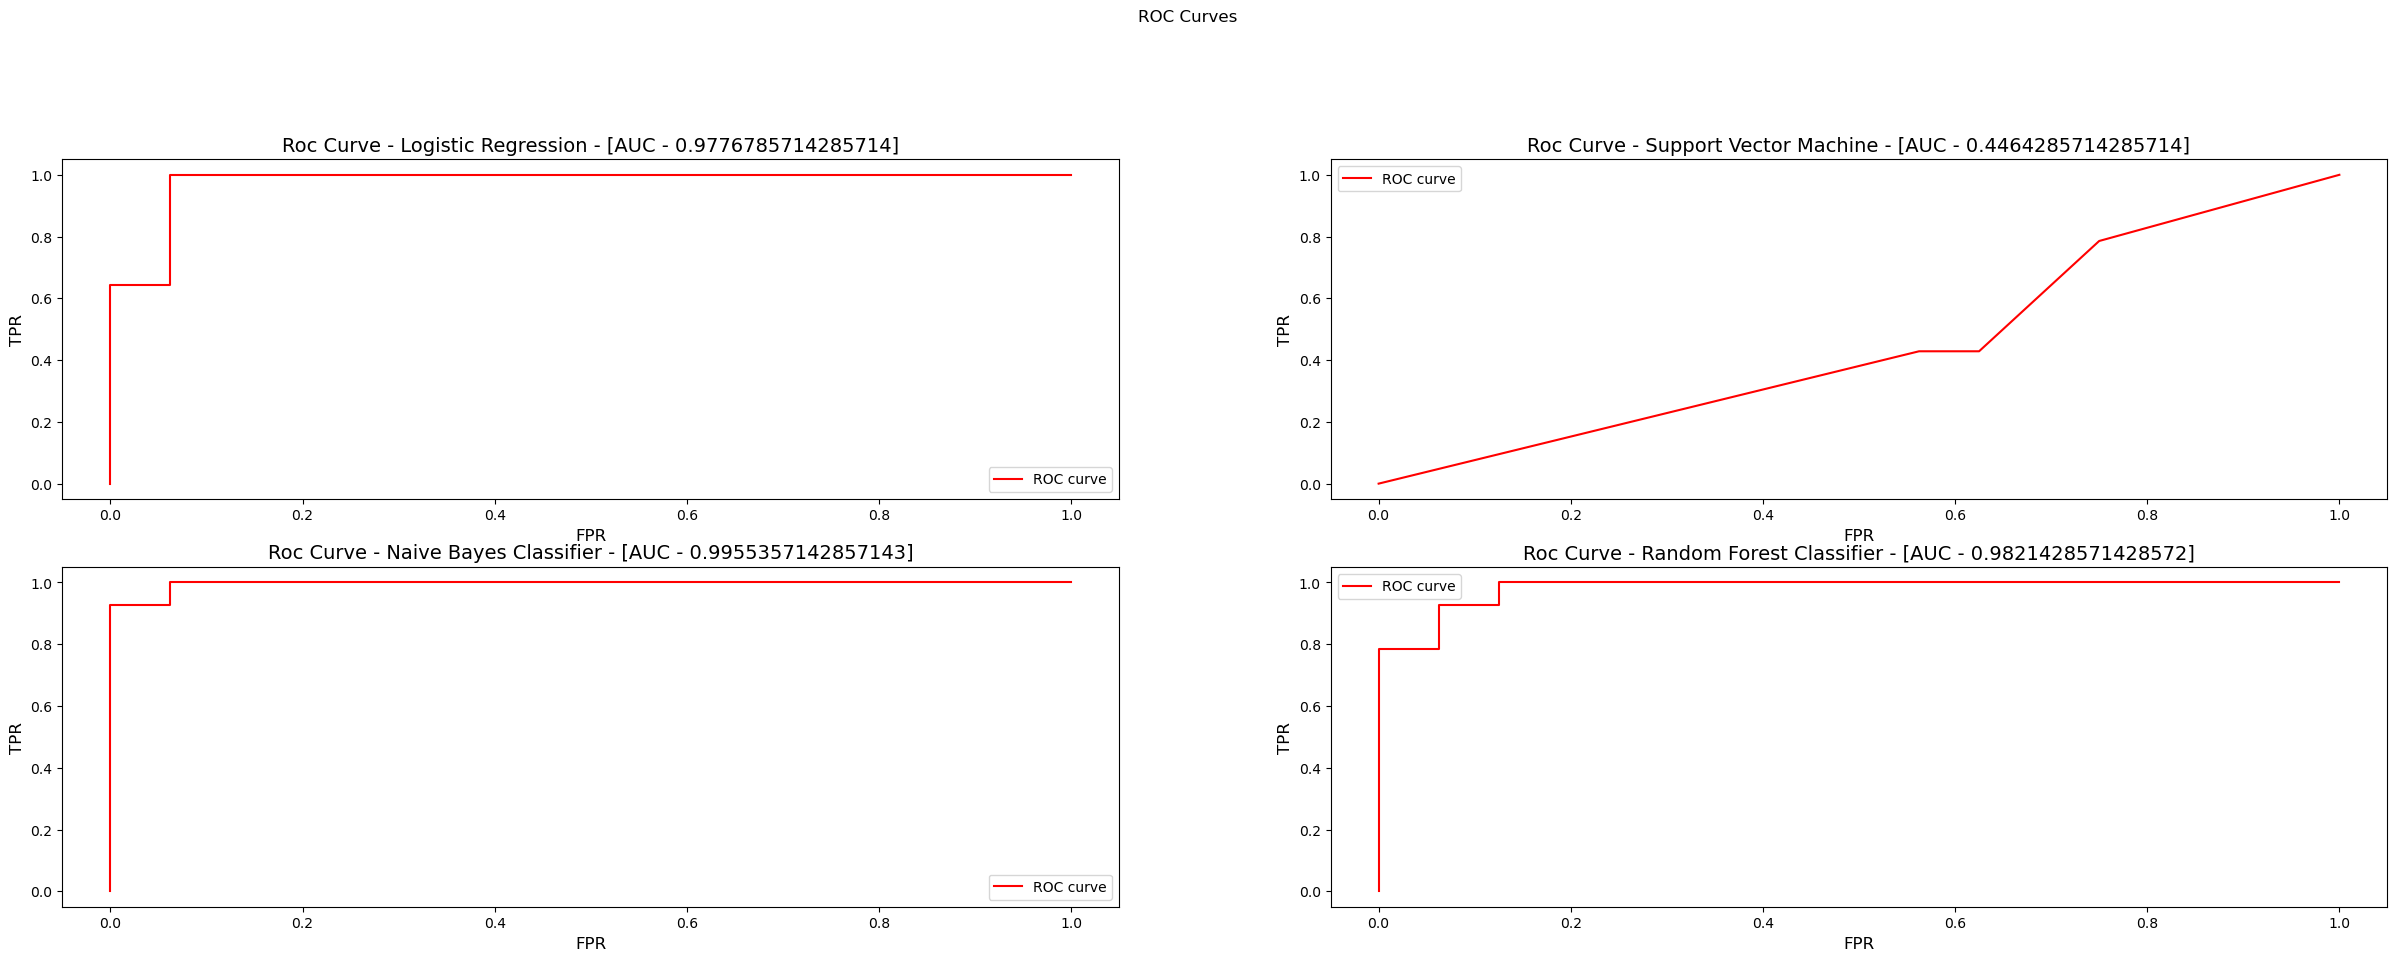

In [118]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
over_sampled_X_train, over_sampled_y_train = oversample.fit_resample(X_train, y_train)
lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()
lc.fit(over_sampled_X_train, over_sampled_y_train)

svc.fit(over_sampled_X_train, over_sampled_y_train)
nbc.fit(over_sampled_X_train, over_sampled_y_train)
rfc.fit(over_sampled_X_train, over_sampled_y_train)
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_knn_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))
models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_knn_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_knn_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()